In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df_train = pd.read_csv("train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Panula, Master. Urho Abraham",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#see any missing data
df_train.isnull().sum()
#Cabin has a lot of missing values, will not use this feature

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Fill age missing data with mean
df_train['Age_filled'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Age_filled']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_filled, Length: 891, dtype: float64

In [8]:
df_train['Embarked'].mode()
#mode is S so fill the 2 missing values with S
df_train['Embarked_filled']=df_train['Embarked'].fillna('S')
df_train['Embarked_filled']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked_filled, Length: 891, dtype: object

In [9]:
#see family size vs survival rate, +1 to include the individual
#family's with a size of 4 were more likely to survive
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [10]:
#show those who were alone and who were
#people who were alone were more likely to survive
df_train['Alone']=0
df_train.loc[df_train['FamilySize'] == 1, 'Alone'] = 1
df_train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [11]:
#Using sex to see what amount of people survived
female = df_train.loc[df_train['Sex'] == 'female']['Survived']
female_rate = sum(female)/len(female)

male = df_train.loc[df_train['Sex'] == 'male']['Survived']
male_rate = sum(male)/len(male)
print(f"% of females survived: {female_rate*100} \n% of male survived: {male_rate*100}")

% of females survived: 74.20382165605095 
% of male survived: 18.890814558058924


In [12]:
#pclass and who survived
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#those in Pclass 1 was more likely to survive

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
#using embark group by to see who survived (C = Cherbourg, Q = Queenstown, S = Southampton)
df_train[['Embarked_filled', 'Survived']].groupby(['Embarked_filled'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#those who embarked in C port were more likely to survive


,Embarked_filled,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<AxesSubplot:xlabel='Sex', ylabel='count'>

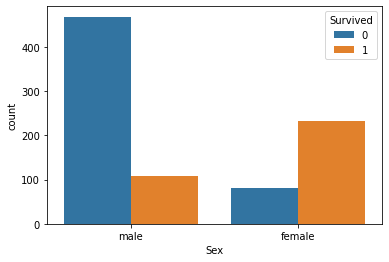

In [14]:
sns.countplot(x="Sex", data=df_train, hue="Survived")
#More females survived than males

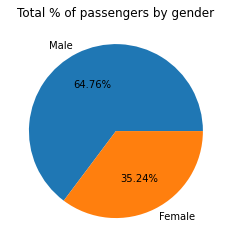

In [15]:
male_total = df_train['Sex'].loc[df_train['Sex'] == 'male'].count()
female_total = df_train['Sex'].loc[df_train['Sex'] == 'female'].count()

x = ["Male", "Female"]
y = [male_total, female_total]
plt.pie(y, labels=x, autopct='%.2f%%')
plt.title("Total % of passengers by gender")
plt.show()
#Showing that more males were on board than females

In [17]:
#graph with Pclass and who survived


<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

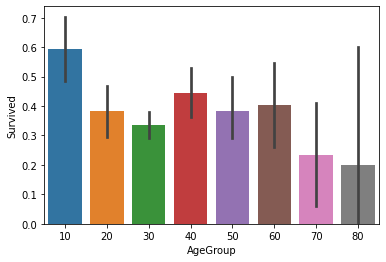

In [36]:
#graph with age group and who survived
df_train["AgeGroup"] = 0
df_train.loc[df_train["Age_filled"] <= 10, "AgeGroup"] = 10
df_train.loc[(df_train["Age_filled"] > 10) & (df_train["Age_filled"] <= 20), "AgeGroup"] = 20
df_train.loc[(df_train["Age_filled"] > 20) & (df_train["Age_filled"] <= 30), "AgeGroup"] = 30
df_train.loc[(df_train["Age_filled"] > 30) & (df_train["Age_filled"] <= 40), "AgeGroup"] = 40
df_train.loc[(df_train["Age_filled"] > 40) & (df_train["Age_filled"] <= 50), "AgeGroup"] = 50
df_train.loc[(df_train["Age_filled"] > 50) & (df_train["Age_filled"] <= 60), "AgeGroup"] = 60
df_train.loc[(df_train["Age_filled"] > 60) & (df_train["Age_filled"] <= 70), "AgeGroup"] = 70
df_train.loc[(df_train["Age_filled"] > 70) & (df_train["Age_filled"] <= 80), "AgeGroup"] = 80
df_train.loc[(df_train["Age_filled"] > 80) & (df_train["Age_filled"] <= 90), "AgeGroup"] = 90
df_train.AgeGroup.value_counts()

sns.barplot(x='AgeGroup', y='Survived', data=df_train)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

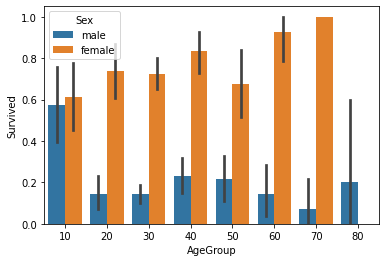

In [37]:
#Age group by gender of those who survived
sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=df_train)

In [ ]:
#graph with embarked and who survived

In [ ]:
#family size vs who survived

In [ ]:
#graph alone vs not alone who survived